In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import itertools

In [15]:
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

In [2]:
filename = 'NSEI'
df = pd.read_csv(filename + '.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(['Date'])


In [3]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


In [4]:
df = df[(df['Date'].dt.dayofweek !=5) &(df['Date'].dt.dayofweek) !=6]
df = df.dropna(axis=0, how='all', subset=df.columns[1:])
df = df.sort_values(['Date'])

In [5]:
closing_prices = df["Close"]

In [6]:
train_data = closing_prices[:int(len(closing_prices) * 0.8)]
test_data = closing_prices[int(len(closing_prices) * 0.8):]

In [7]:
model = ARIMA(train_data, order=(1, 2, 1))
model_fit = model.fit()

c:\Users\dipgh\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dipgh\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dipgh\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [8]:
# Output AIC and BIC values
print("AIC: ", model_fit.aic)
print("BIC: ", model_fit.bic)

AIC:  38000.184568897836
BIC:  38018.39822451775


In [10]:
predictions = model_fit.forecast(steps=len(test_data))
# Compute root mean squared error (RMSE)
mse_error = mean_squared_error(test_data, predictions)
rmse = sqrt(mse_error)
print("MSE: ", mse_error)
print("RMSE: ", rmse)


MSE:  20620049.924470693
RMSE:  4540.93051306345


c:\Users\dipgh\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


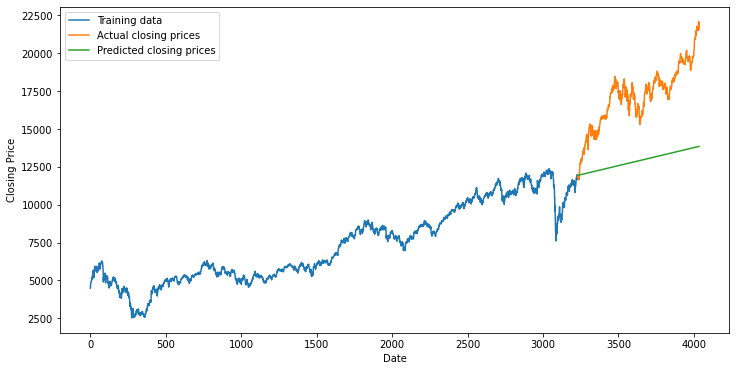

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(train_data, label="Training data")
plt.plot(test_data, label="Actual closing prices")
plt.plot(test_data.index, predictions, label="Predicted closing prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

In [13]:
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
pdq_combinations = list(itertools.product(p_values, d_values, q_values))
best_aic = float("inf")
best_order = None
best_model = None


In [21]:
for order in pdq_combinations:
    try:
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_order = order
            best_model = model_fit
        print(f"Optimal ARIMA order: {best_order}, AIC:  {best_aic}, BIC: {best_model.bic}")
    except Exception as e:
        print(f"Error fitting ARIMA model with order {order}")

Optimal ARIMA order: (2, 1, 4), AIC:  37936.0287700041, BIC: 37978.529486258994
Optimal ARIMA order: (2, 1, 4), AIC:  37936.0287700041, BIC: 37978.529486258994
Optimal ARIMA order: (2, 1, 4), AIC:  37936.0287700041, BIC: 37978.529486258994
Optimal ARIMA order: (2, 1, 4), AIC:  37936.0287700041, BIC: 37978.529486258994
Optimal ARIMA order: (2, 1, 4), AIC:  37936.0287700041, BIC: 37978.529486258994
Optimal ARIMA order: (2, 1, 4), AIC:  37936.0287700041, BIC: 37978.529486258994
Optimal ARIMA order: (2, 1, 4), AIC:  37936.0287700041, BIC: 37978.529486258994
Optimal ARIMA order: (2, 1, 4), AIC:  37936.0287700041, BIC: 37978.529486258994
Optimal ARIMA order: (2, 1, 4), AIC:  37936.0287700041, BIC: 37978.529486258994
Optimal ARIMA order: (2, 1, 4), AIC:  37936.0287700041, BIC: 37978.529486258994
Optimal ARIMA order: (2, 1, 4), AIC:  37936.0287700041, BIC: 37978.529486258994
Optimal ARIMA order: (2, 1, 4), AIC:  37936.0287700041, BIC: 37978.529486258994
Optimal ARIMA order: (2, 1, 4), AIC:  37

In [24]:
predictions = best_model.forecast(steps=len(test_data))
# Compute root mean squared error (RMSE)
mse_error = mean_squared_error(test_data, predictions)
rmse = sqrt(mse_error)
print("RMSE: ", rmse)


RMSE:  4527.975347859183


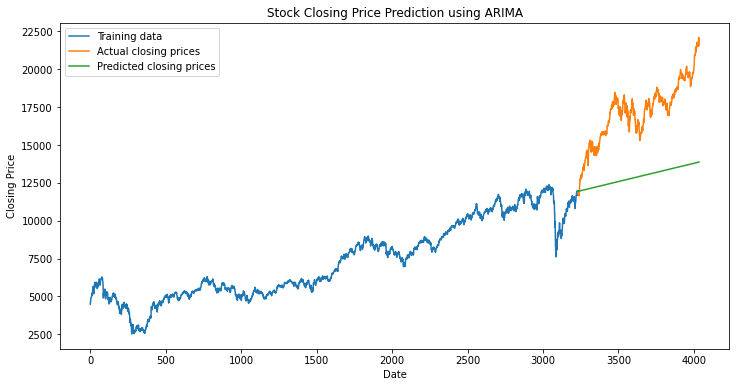

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(train_data, label="Training data")
plt.plot(test_data, label="Actual closing prices")
plt.plot(test_data.index, predictions, label="Predicted closing prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Closing Price Prediction using ARIMA")
plt.legend()
plt.show()